![Eigen Face feature extraction ](Eigen_Face.png/)

## Feacture Extraction with Eigen Face 
- import all the requirments 


In [34]:
#  featire Extractopm 
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import cv2

# eigen face
from sklearn.decomposition import PCA

import pickle

In [35]:
data =  pickle.load(open('./data/data_images_100_100.pickle',mode='rb'))

In [36]:
data.head()

,pixels_0,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,...,pixels_9991,pixels_9992,pixels_9993,pixels_9994,pixels_9995,pixels_9996,pixels_9997,pixels_9998,pixels_9999,gender
0,0.211765,0.235294,0.211765,0.227451,0.231373,0.211765,0.215686,0.235294,0.215686,0.176471,...,0.109804,0.129412,0.156863,0.192157,0.227451,0.203922,0.168627,0.156863,0.137255,female
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,female
2,0.066667,0.066667,0.074510,0.086275,0.074510,0.078431,0.098039,0.086275,0.101961,0.113725,...,0.756863,0.760784,0.764706,0.764706,0.764706,0.756863,0.760784,0.760784,0.764706,female
3,0.090196,0.109804,0.125490,0.117647,0.094118,0.082353,0.086275,0.098039,0.109804,0.109804,...,0.054902,0.070588,0.050980,0.003922,0.011765,0.078431,0.121569,0.125490,0.090196,female
4,0.047059,0.043137,0.050980,0.054902,0.062745,0.090196,0.078431,0.113725,0.156863,0.164706,...,0.737255,0.792157,0.819608,0.858824,0.835294,0.866667,0.839216,0.639216,0.533333,female


In [37]:
#Eigen Face 
# Mean Face 
X=data.drop('gender',axis=1).values # all images 

In [38]:
X

array([[0.21176471, 0.23529412, 0.21176471, ..., 0.16862745, 0.15686275,
        0.1372549 ],
       [0.1254902 , 0.09019608, 0.12156863, ..., 0.14509804, 0.24705882,
        0.07058824],
       [0.06666667, 0.06666667, 0.0745098 , ..., 0.76078431, 0.76078431,
        0.76470588],
       ...,
       [0.89019608, 0.89411765, 0.89019608, ..., 0.88235294, 0.89019608,
        0.90980392],
       [0.20392157, 0.21568627, 0.21568627, ..., 0.71764706, 0.70980392,
        0.70196078],
       [0.67058824, 0.65882353, 0.65098039, ..., 0.79215686, 0.80784314,
        0.82352941]], shape=(4308, 10000))

In [39]:
mean_face = X.mean(axis=0)
mean_face.shape

(10000,)

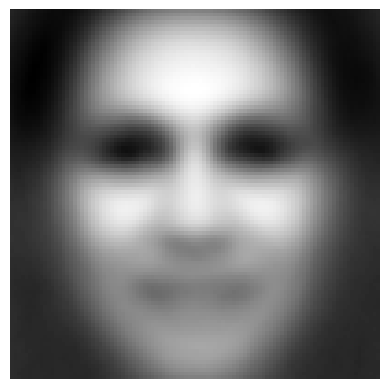

In [40]:
# visualization mean face 
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()


In [41]:
# Sbstract data with mean face 
X_t = X- mean_face #Transformed data 


In [42]:
data.head()

,pixels_0,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,...,pixels_9991,pixels_9992,pixels_9993,pixels_9994,pixels_9995,pixels_9996,pixels_9997,pixels_9998,pixels_9999,gender
0,0.211765,0.235294,0.211765,0.227451,0.231373,0.211765,0.215686,0.235294,0.215686,0.176471,...,0.109804,0.129412,0.156863,0.192157,0.227451,0.203922,0.168627,0.156863,0.137255,female
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,female
2,0.066667,0.066667,0.074510,0.086275,0.074510,0.078431,0.098039,0.086275,0.101961,0.113725,...,0.756863,0.760784,0.764706,0.764706,0.764706,0.756863,0.760784,0.760784,0.764706,female
3,0.090196,0.109804,0.125490,0.117647,0.094118,0.082353,0.086275,0.098039,0.109804,0.109804,...,0.054902,0.070588,0.050980,0.003922,0.011765,0.078431,0.121569,0.125490,0.090196,female
4,0.047059,0.043137,0.050980,0.054902,0.062745,0.090196,0.078431,0.113725,0.156863,0.164706,...,0.737255,0.792157,0.819608,0.858824,0.835294,0.866667,0.839216,0.639216,0.533333,female


In [43]:
# apply X_t data to PCA 
# 1.find the right number of component - elbow
# 2.with right number component computer principal components 


In [44]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')


In [45]:
pca.fit(X_t)

MemoryError: Unable to allocate 567. MiB for an array with shape (74265612,) and data type float64

In [20]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var']=exp_var_df['explained_var'].cumsum()
exp_var_df['principal_component'] = np.arange(1,len(exp_var_df)+1)
exp_var_df.head()

,explained_var,cum_explained_var,principal_component
0,0.250776,0.250776,1
1,0.115572,0.366348,2
2,0.104938,0.471287,3
3,0.051463,0.522750,4
4,0.032812,0.555562,5


In [21]:
# visualize the elbow 
exp_var_df.set_index('principal_component',inplace=True)


<Axes: xlabel='principal_component'>

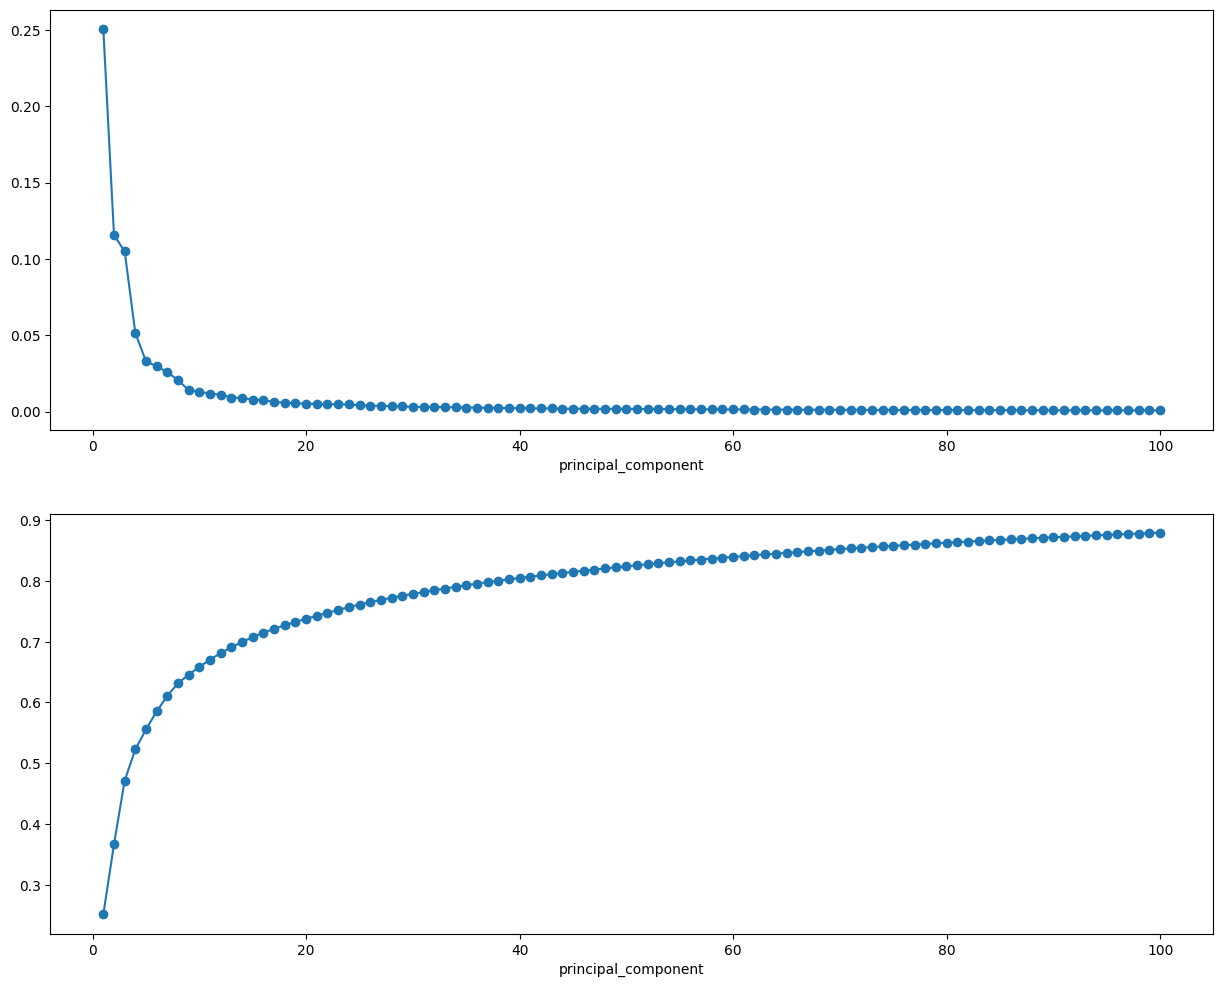

In [22]:
# Visualize explained variance 
fig,ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])

In [26]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data =pca_50.fit_transform(X_t)

In [27]:
pca_data.shape

(4308, 50)

In [28]:
# Saving data and models 
y = data['gender'].values # independent variable 
np.savez('./data/data_pca_50_target',pca_data,y)

In [29]:
# Saving the model
pca_dict = {'pca_50':pca_50,'mean_face':mean_face}
 

In [30]:
pickle.dump(pca_dict,open('./model/pca_dict.pickle','wb')) 

In [31]:
# Visualize Eigen image
pca_data_inv = pca_50.inverse_transform(pca_data)
pca_data_inv.shape

(4308, 10000)

In [32]:
eig_img =pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

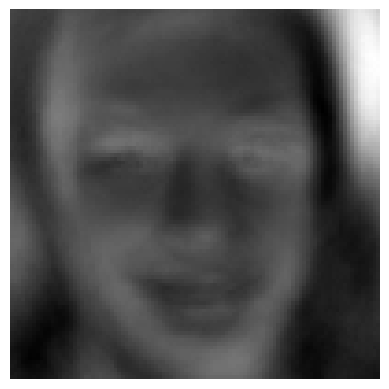

In [33]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

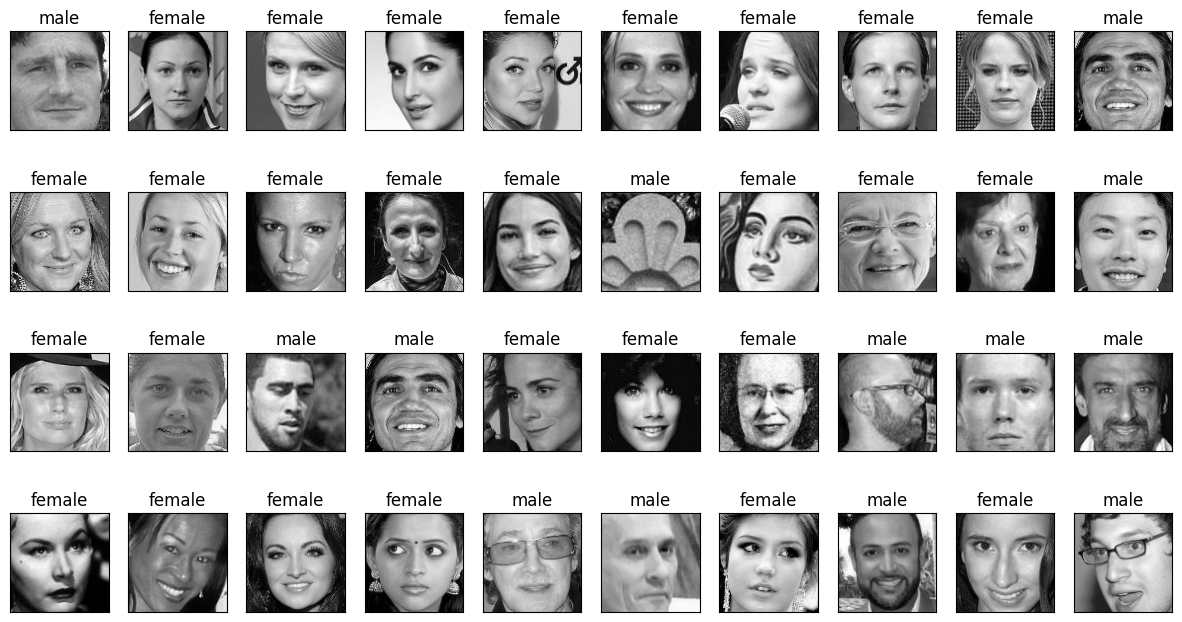

====================Eigen Images====================


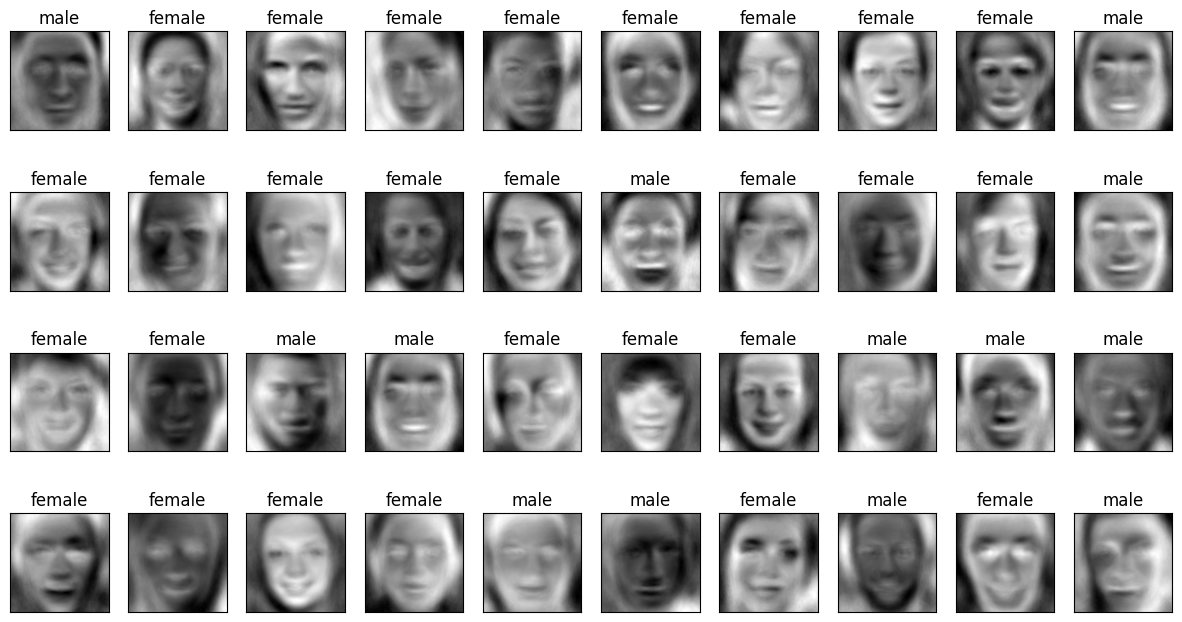

In [49]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()
print("="*20+"Eigen Images"+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()